# DESARROLLO DE UN MODELO DE APRENDIZAJE AUTOMÁTICO PARA DETERMINAR LA PROBABILIDAD DE PADECER UN ACCIDENTE CEREBRO VASCULAR (ACV) EN LAS PERSONAS, SEGÚN DATOS DE LA ORGANIZACIÓN MUNDIAL DE LA SALUD (OMS)

### Elaborado por: Antonio Boza - Científico de Datos
Github Portafolio: https://antonyboza.github.io/Portfolio/

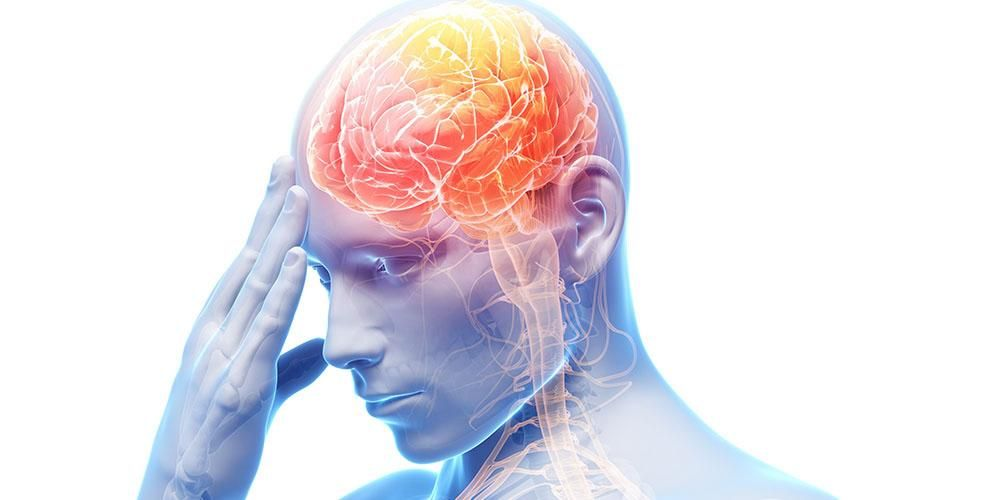

### **OBJETIVO DEL PROYECTO** 

Desarrollar un modelo de aprendizaje automático que permita predecir el riesgo de un paciente de padecer de un ACV en función de sus variables de riesgo. Esto le permitirá a la OMS educar a los pacientes sobre los factores de riesgo, así como recomendar medidas preventivas para los pacientes con riesgo de ACV que le permitan mejorar su condición y llevar una vida saludable.

### **QUÉ ES UN ACCIDENTE CEREBROVASCULAR** 

El accidente cerebrovascular (ACV) es una enfermedad que se produce cuando se interrumpe o reduce el suministro de sangre a una parte del cerebro. Este fenómeno impide que el tejido cerebral reciba oxígeno y nutrientes. Es una emergencia médica. Según datos de salud de los EEUU, el ACV es la quinta causa de muerte en ese país. Cada año, más de 795.000 personas estadounidenses sufren de esta enfermedad.

### **ANÁLISIS DE LOS DATOS (DATASET)**

In [894]:
# Importamos los paquetes y librerías que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import resample

In [895]:
# Importamos los datos
dataset = pd.read_csv('who.csv')

In [896]:
# Visualizamos las primeras 5 filas
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [897]:
# Obtenemos la información general sobre cantidad de registros por atributo y el tipo de dato
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### DESCRIPCIÓN DE LOS ATRIBUTOS

**ID**: Número entero correlativo del paciente (identificador único)

**gender**: género del paciente "Male" (Masculino) o "Female" (Femenino)

**age**: edad del paciente. Dato tipo decimal flotante

**hypertension**: si la persona ha sufrido de hipertensión (1) o no (0). Tipo entero.

**heart_disease**: si la persona ha sufrido de enfermedades del corazón (1) o no (0). Tipo entero.

**ever_married**: variable categórica que indica si la persona ha estado casada (1) o no (0)

**work_type**: variable categórica que indica el tipo de empleo de la persona y se compone de varias subcategorías:

 - Private - Privado       
 - Self-employed - Empleado por cuenta propia     
 - children - menores de edad        
 - Govt_job - Trabajo gubernamental        
 - Never_worked - Nunca ha trabajado
 
**Residence_type**: variable categórica que indica el tipo de área donde está ubicada la residencia y se compone de 2 subcategorías:

 - Urbana
 - Rural
 
**avg_glucose_level**: promedio de glucosa en la sangre. Dato tipo decimal flotante.

**bmi**: índice de masa corporal. Dato tipo decimal flotante.

**smoking_status**: variable categórica que indica el si el estatus del paciente con respecto al cigarrillo y se compone de 4 subcategorías:

 - never smoked - Nunca ha fumado
 - Unknown - No se sabe
 - formerly smoked - Fumaba anteriormente
 - smokes - fuma actualmente
 
**stroke**: variable binaria a predecir. Indica si el paciente podría sufrir un ACV (1) o no (0)

In [898]:
# Observamos que la dataset tiene 5110 registros con 12 columnas. 
dataset.shape

(5110, 12)

In [899]:
# Calculamos el Porcentaje total de datos faltantes para tener una mejor idea de cuán completo está el dataset
missing_data = dataset.isnull().sum()
total_percentage = (missing_data.sum()/dataset.shape[0]) * 100
print(f'El porcentaje total de datos faltantes es de {round(total_percentage,2)}%')

El porcentaje total de datos faltantes es de 3.93%


In [900]:
# Revisamos cuál(es) atributo(s) son los más incompleto(s)
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [901]:
# Validamos las Principales variables estadísticas
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### LIMPIEZA DE LOS DATOS

In [902]:
# Como pudimos observar, tenemos datos faltantes sólo en el atributo **bmi** (201 registros). Por ser este un dato importante
# y ser de tipo decimal, podemos sustituir esos registros faltantes por el **promedio** de todos los registros de bmi. 
# Así evitamos eliminarlos y perder datos valiosos.

dataset.bmi = dataset.bmi.fillna(dataset.bmi.mean())

In [903]:
# Validamos que se hayan reemplazdo esos registros
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [904]:
# Hacemos una copia de respaldo de los datos originales. Creamos un punto de recuperación 
dataset = dataset.copy()

In [905]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [906]:
# En vista de que la columna "id" no afecta de ninguna manera la predicción, procedemos a quitarla del dataset
dataset = dataset.drop('id', axis=1)

In [907]:
# Verificamos que efectivamente ya no está esa columna
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### Hacemos un conteo general de personas con y sin ACV para tener una idea del desbalance en la muestra

In [908]:
dataset.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

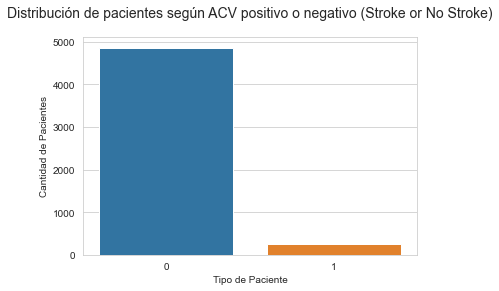

Hay 4861 pacientes sin ACV y 249 pacientes con ACV


In [909]:
sns.countplot(x='stroke',data=dataset)
plt.title('Distribución de pacientes según ACV positivo o negativo (Stroke or No Stroke)', loc='center', pad='20', fontsize='14')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Cantidad de Pacientes')
plt.show()
cases = dataset.stroke.value_counts()
print(f"Hay {cases[0]} pacientes sin ACV y {cases[1]} pacientes con ACV")

In [910]:
# Los datos no están bien equilibrados, ya que el número de personas sin la enfermedad supera ampliamente el número de personas con la enfermedad. 
# La proporción es de aproximadamente 1:19,52. Esto nos indica que tendremos que balancear los datos más adelante.

#### Hacemos que las variables categóricas sean más autoexplicativas para los gráficos

In [911]:
stroke_dataset = dataset.copy()
stroke_dataset['Stroke'] = stroke_dataset.stroke.copy()
stroke_dataset = stroke_dataset.drop('stroke', axis=1)
stroke_dataset.hypertension = stroke_dataset.hypertension.apply(lambda x: 'Hypertension' if x == 1 else 'No Hypertension')
stroke_dataset.heart_disease = stroke_dataset.heart_disease.apply(lambda x: 'Heart Disease' if x == 1 else 'No Heart Disease')
stroke_dataset.ever_married = stroke_dataset.ever_married.apply(lambda x: 'Married' if x == 'Yes' else 'Unmarried')
stroke_dataset.Stroke = stroke_dataset.Stroke.apply(lambda x: 'Stroke' if x == 1 else 'No Stroke')
stroke_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke
0,Male,67.0,No Hypertension,Heart Disease,Married,Private,Urban,228.69,36.600000,formerly smoked,Stroke
1,Female,61.0,No Hypertension,No Heart Disease,Married,Self-employed,Rural,202.21,28.893237,never smoked,Stroke
2,Male,80.0,No Hypertension,Heart Disease,Married,Private,Rural,105.92,32.500000,never smoked,Stroke
3,Female,49.0,No Hypertension,No Heart Disease,Married,Private,Urban,171.23,34.400000,smokes,Stroke
4,Female,79.0,Hypertension,No Heart Disease,Married,Self-employed,Rural,174.12,24.000000,never smoked,Stroke


### ANÁLISIS DE VARIABLES NUMÉRICAS Vs STROKE (ACV)

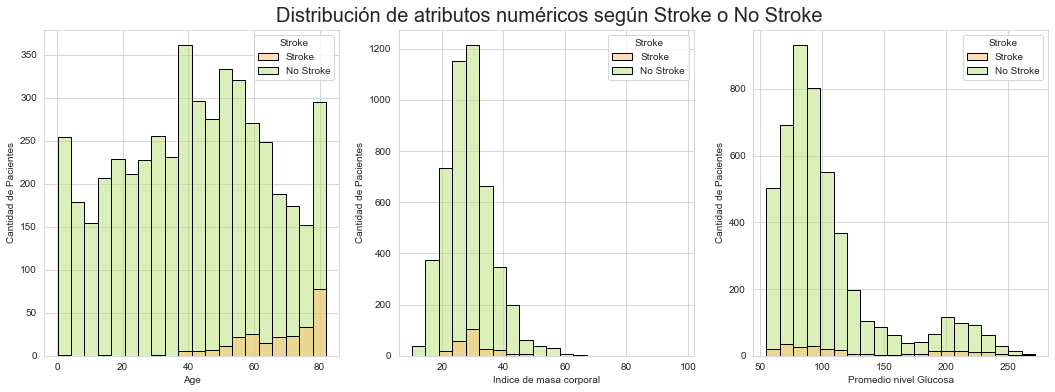

In [912]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(18,6))
plt.text(-120,1000, 'Distribución de atributos numéricos según Stroke o No Stroke', horizontalalignment='center', fontsize=20)

sns.histplot(x='age', data=stroke_dataset, hue='Stroke', palette='RdYlGn', bins=20, edgecolor='black', ax=ax1)
ax1.set(xlabel='Age', ylabel='Cantidad de Pacientes')

sns.histplot(x='bmi', data=stroke_dataset, hue='Stroke', palette='RdYlGn', bins=20, edgecolor='black', ax=ax2)
ax2.set(xlabel='Indice de masa corporal', ylabel='Cantidad de Pacientes')

sns.histplot(x='avg_glucose_level', data=stroke_dataset, hue='Stroke', palette='RdYlGn', bins=20, edgecolor='black', ax=ax3)
ax3.set(xlabel='Promedio nivel Glucosa', ylabel='Cantidad de Pacientes')
plt.show()

### ANÁLISIS DE VARIABLES CATEGÓRICAS Vs STROKE (ACV)

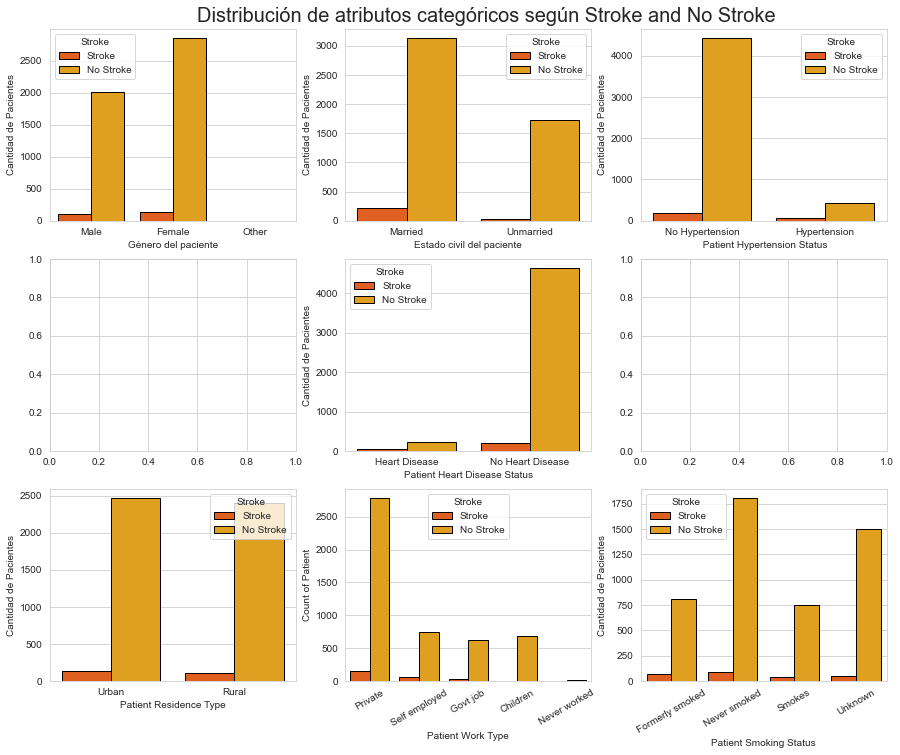

In [913]:
fig, ax = plt.subplots(3, 3, figsize=(15,12))

plt.text(-3,6500, 'Distribución de atributos categóricos según Stroke and No Stroke', horizontalalignment='center', fontsize=20)
sns.countplot(x='gender', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[0][0], edgecolor='black')
ax[0][0].set(xlabel='Género del paciente', ylabel='Cantidad de Pacientes')

sns.countplot(x='ever_married', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[0][1], edgecolor='black')
ax[0][1].set(xlabel='Estado civil del paciente', ylabel='Cantidad de Pacientes')

sns.countplot(x='hypertension', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[0][2], edgecolor='black')
ax[0][2].set(xlabel=' Patient Hypertension Status', ylabel='Cantidad de Pacientes')

sns.countplot(x='heart_disease', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[1][1], edgecolor='black')
ax[1][1].set(xlabel='Patient Heart Disease Status', ylabel='Cantidad de Pacientes')

sns.countplot(x='Residence_type', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[2][0], edgecolor='black')
ax[2][0].set(xlabel='Patient Residence Type', ylabel='Cantidad de Pacientes')

sns.countplot(x='work_type', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[2][1], edgecolor='black')
ax[2][1].set(xlabel='Patient Work Type', ylabel='Count of Patient')
labels = ['Private', 'Self employed', 'Govt job', 'Children', 'Never worked']
ax[2][1].set_xticklabels(labels, rotation=30, horizontalalignment='center')

sns.countplot(x='smoking_status', data=stroke_dataset, hue='Stroke', palette='autumn', ax=ax[2][2], edgecolor='black')
ax[2][2].set(xlabel='Patient Smoking Status', ylabel='Cantidad de Pacientes')
labels = ['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown',]
ax[2][2].set_xticklabels(labels, rotation=30, horizontalalignment='center')
plt.show()


### Distribución de personas con ACV según la edad

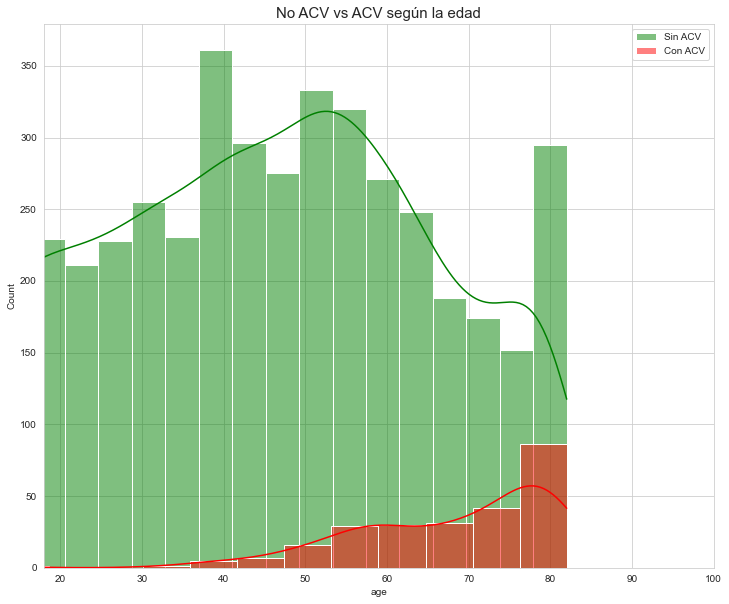

In [914]:
plt.figure(figsize=(12,10))

sns.histplot(dataset[dataset['stroke'] == 0]["age"], color='green', label="Sin ACV", kde= True)
sns.histplot(dataset[dataset['stroke'] == 1]["age"], color='red', label="Con ACV", kde= True)

plt.title('No ACV vs ACV según la edad', fontsize=15)
plt.xlim([18,100])
plt.legend();

### Distribución del promedio del nivel de Glucosa en la sangre

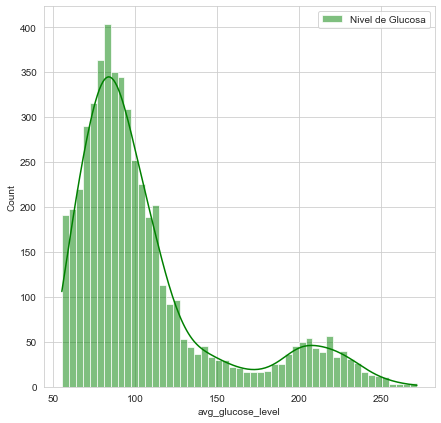

In [915]:
fig = plt.figure(figsize=(7,7))
sns.histplot(dataset.avg_glucose_level, color="green", label="Nivel de Glucosa", kde= True)
plt.legend();

### Relación entre nivel de Glucosa en la sangre Vs índice de masa corporal (BMI) 

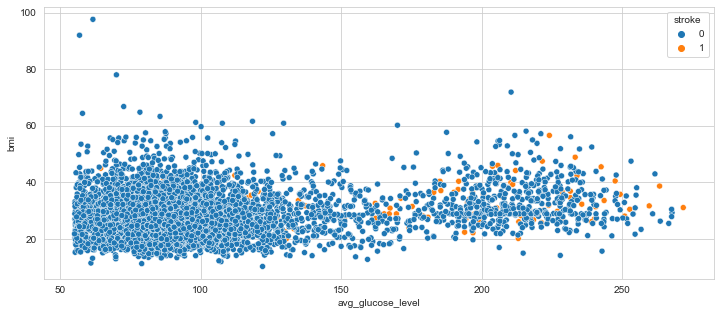

In [916]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=dataset);

### MAPA DE CALOR DE CORRELACIÓN (HEAT MAP)

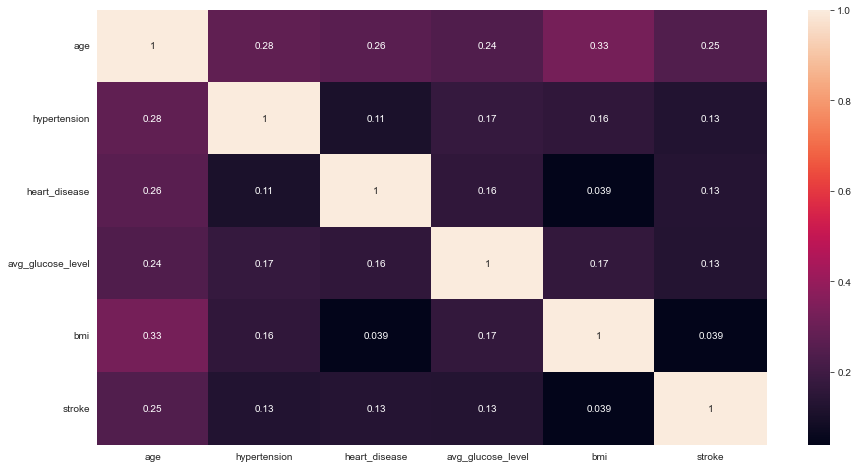

In [917]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

### ADECUACIÓN DE LOS DATOS, MODELADO Y PREDICCIONES

In [918]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [919]:
# Convertimos a tipo categórica las variables no numéricas

In [920]:
X = dataset.drop(['stroke'], axis=1)
y = dataset['stroke']

In [921]:
X.shape, y.shape

((5110, 10), (5110,))

In [922]:
type(X)

pandas.core.frame.DataFrame

In [923]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [924]:
l_e = LabelEncoder()
X['gender'] = l_e.fit_transform(X['gender']) # gender column
X['ever_married'] = l_e.fit_transform(X['ever_married']) # ever_married column
X['Residence_type'] = l_e.fit_transform(X['Residence_type']) # Residence_type column

In [925]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked


In [926]:
c_t = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
X = np.array(c_t.fit_transform(X))

#### Determinamos la importancia de los Atributos (Feature importance)

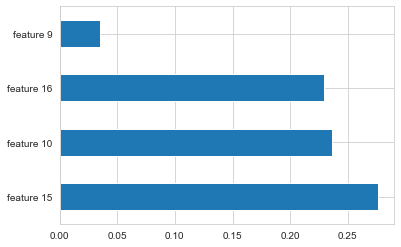

In [927]:
# Utilizamos un modelo de árboles aleatorios de decisión para obtener los valores de importancia relativa de cada atributo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#X=dataset.iloc[:,:-1]
#y=dataset.iloc[:,-1]
model.fit(X, y)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

(pd.Series(model.feature_importances_, index=feature_names)
   .nlargest(4)
   .plot(kind='barh')) 

In [928]:
print(feature_names)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13', 'feature 14', 'feature 15', 'feature 16']


In [929]:
print(model.feature_importances_)

[1.32519497e-02 1.43984918e-05 1.92910209e-02 1.66203638e-02
 1.23519946e-03 1.62386968e-02 1.75307962e-02 1.92932151e-02
 1.68554641e-02 3.47401732e-02 2.36400757e-01 2.53454009e-02
 2.42220125e-02 1.88021078e-02 3.43781844e-02 2.76557158e-01
 2.29223102e-01]


#### Los atributos más importantes son:
1. age
2. avg_glucose_level
3. bmi
4. Residence_type

#### El nuevo set de datos con los atributos más importantes

In [930]:
data = pd.DataFrame(X, columns=feature_names)

In [931]:
data.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.600000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.893237
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.500000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.400000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.000000


In [932]:
data = data.drop(['feature 0','feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9', 'feature 11', 'feature 12', 'feature 13'], axis=1)

In [933]:
data.head()

,feature 10,feature 14,feature 15,feature 16
0,67.0,1.0,228.69,36.600000
1,61.0,0.0,202.21,28.893237
2,80.0,0.0,105.92,32.500000
3,49.0,1.0,171.23,34.400000
4,79.0,0.0,174.12,24.000000


In [934]:
data.shape

(5110, 4)

In [935]:
y.shape

(5110,)

In [936]:
# Renombramos las columnas con los nombres de los atributos

In [937]:
data.rename(columns = {'feature 10':'age', 'feature 14':'Residence_type',
                              'feature 15':'avg_glucose_level', 'feature 16':'bmi'}, inplace = True)

In [938]:
data.head()

,age,Residence_type,avg_glucose_level,bmi
0,67.0,1.0,228.69,36.600000
1,61.0,0.0,202.21,28.893237
2,80.0,0.0,105.92,32.500000
3,49.0,1.0,171.23,34.400000
4,79.0,0.0,174.12,24.000000


In [939]:
X = data.values

In [940]:
y = y.values

In [941]:
type(y)

numpy.ndarray

In [942]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [943]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4088, 4), (4088,), (1022, 4), (1022,))

#### Balanceamos el set de Datos

**Como el conjunto de datos está desequilibrado, es decir, por cada caso positivo hay unos 20 casos negativos. 
Podemos terminar con un clasificador que esté sesgado hacia los casos negativos. 
El clasificador puede tener una alta exactitud pero una pobre precisión y recuperación. 
Para solucionar esto, equilibraremos el conjunto de datos utilizando la técnica de sobremuestreo sintético de minorías (SMOTE).**

**SMOTE selecciona primero una instancia de clase minoritaria a al azar y encuentra sus k vecinos de clase minoritaria más cercanos. La instancia sintética se crea entonces eligiendo uno de los k vecinos más cercanos b al azar y conectando a y b para formar un segmento de línea en el espacio de características. Las instancias sintéticas se generan como una combinación convexa de las dos instancias elegidas a y b.
Este procedimiento puede utilizarse para crear tantos ejemplos sintéticos para la clase minoritaria como sea necesario. Se sugiere utilizar primero un submuestreo aleatorio para recortar el número de ejemplos de la clase mayoritaria y, a continuación, utilizar SMOTE para sobremuestrear la clase minoritaria a fin de equilibrar la distribución de clases.**


In [944]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [945]:
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [946]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [947]:
print(num_before, num_after)

{1: 249, 0: 4861} {0: 4860, 1: 3888}


In [948]:
type(num_before)

dict

In [949]:
num_before = dict(Counter(y))

In [950]:
print(num_before)

{1: 249, 0: 4861}


In [951]:
num_after = dict(Counter(y_smote))

In [952]:
print(num_after)

{0: 4860, 1: 3888}


#### Visualizamos el antes y después de balancear el set de datos

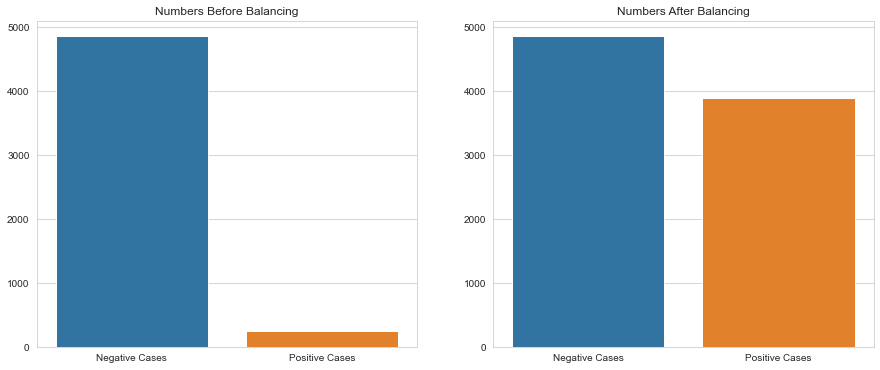

In [953]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(reversed(list(num_before.values()))))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

**Tras aplicar SMOTE, el nuevo conjunto de datos está mucho más equilibrado: la nueva proporción entre casos negativos 
y positivos es de 1:1,2**

#### Separamos los datos en dos para entrenamiento ("Train") y prueba ("Test")

In [954]:
# Creamos un nuevo set de datos en pandas (DataFrame)
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [955]:
new_data.head()

,age,Residence_type,avg_glucose_level,bmi,stroke
0,33.0,0.0,80.21,27.8,0
1,28.0,1.0,74.61,32.7,0
2,72.0,1.0,81.05,30.3,0
3,46.0,1.0,127.75,30.5,0
4,40.0,1.0,82.46,25.3,0


In [956]:
X_new = new_data.drop('stroke', axis=1)
y_new= new_data.iloc[:,-1]

In [957]:
X_new.head()

,age,Residence_type,avg_glucose_level,bmi
0,33.0,0.0,80.21,27.8
1,28.0,1.0,74.61,32.7
2,72.0,1.0,81.05,30.3
3,46.0,1.0,127.75,30.5
4,40.0,1.0,82.46,25.3


In [958]:
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [959]:
# Dividimos el set de datos en 2 (train y test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

#### Normalizamos los datos

**La normalización es una técnica que se aplica a menudo como parte de la preparación de los datos para el aprendizaje 
automático. El objetivo de la normalización es cambiar los valores de las columnas numéricas del conjunto de datos 
para utilizar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información, 
la salida oscilará entre 0 y 1**

In [960]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#### Revisamos la dimensión de los sets de entrenamiento y de prueba

In [961]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6998, 4), (6998,), (1750, 4), (1750,))

#### Entrenamiento y Evaluación de modelos

Utilizaremos los siguientes algoritmos para entrenar los modelos y escoger el más óptimo:

1. Regresión Logística
2. k-Nearest Neighbours
3. Arboles de Decisión (Decision Trees)
4. Support Vector Machine (SVM)
5. XGBoost

#### 1. Regresión Logística

El objetivo de la regresión logística es encontrar el modelo que mejor se ajuste para describir la relación entre la variable dependiente (variable de respuesta o resultado) y un conjunto de variables independientes (predictoras o explicativas). La regresión logística genera los coeficientes (y sus errores estándar y niveles de significación) de una fórmula para predecir la probabilidad de presencia de la característica de interés. En lugar de elegir los parámetros que minimizan la suma de errores al cuadrado (como en la regresión ordinaria), la estimación en la regresión logística elige los parámetros que maximizan la probabilidad de observar los valores de la muestra.


In [962]:
#Importamos las librerías que utiluizaremos en el entrenamiento y evaluación del modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [963]:
# Buscamos los parámetros más óptimos usando Gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [964]:
# Entrenamos el modelo
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [965]:
# Hacemos las Predicciones
logistic_predict = logistic_clf.predict(X_test)

In [966]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Usando Regresión logistica obtenemos una precisión de {round(log_accuracy*100,2)}%")

Usando Regresión logistica obtenemos una precisión de 77.37%


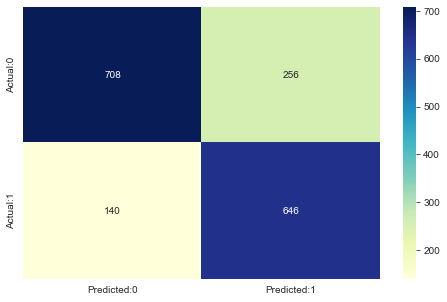

In [967]:
# Evaluamos la matriz de confusión
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [968]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       964
           1       0.72      0.82      0.77       786

    accuracy                           0.77      1750
   macro avg       0.78      0.78      0.77      1750
weighted avg       0.78      0.77      0.77      1750



In [969]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'El score f1 para Regresión Logística es de {round(logistic_f1*100,2)}%')

El score f1 para Regresión Logística es de 76.54%


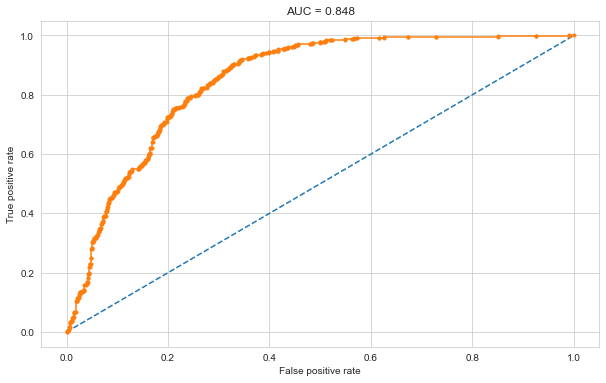

In [970]:
# Construimos las curvas ROC y AUC para evaluar el desempaño del modelo
probs = logistic_clf.predict_proba(X_test)

# Mantenemos las probabilidades de resultado positivo
probs = probs[:, 1]

# calculamos la curva AUC
log_auc = roc_auc_score(y_test, probs)

# calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

#### 2. k-Nearest Neighbours

El algoritmo de k-Nearest Neighbours es un algoritmo de clasificación de datos que intenta determinar en qué grupo se encuentra un punto de datos observando los puntos de datos que lo rodean.

Un algoritmo que mira un punto en una cuadrícula, tratando de determinar si un punto está en el grupo A o B, mira los estados de los puntos que están cerca de él. El rango se determina de forma arbitraria, pero la cuestión es tomar una muestra de los datos. Si la mayoría de los puntos están en el grupo A, entonces es probable que el punto de datos en cuestión sea A y no B, y viceversa.

In [971]:
from sklearn.neighbors import KNeighborsClassifier

In [972]:
# Buscamos los parámetros más óptimos usando Gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [973]:
# Entrenamos el modelo
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [974]:
# Hacemos las predicciones
knn_predict = knn_clf.predict(X_test)

In [975]:
# Calcula mos la precisión 
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Usando k-nearest neighbours obtenemos una precisión de {round(knn_accuracy*100,2)}%")

Usando k-nearest neighbours obtenemos una precisión de 92.69%


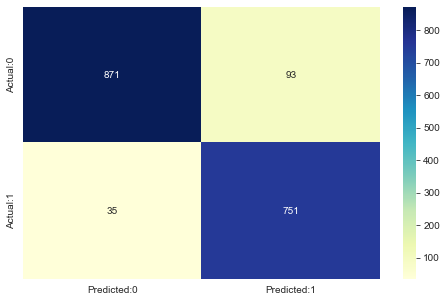

In [976]:
# Evaluamos la matriz de confusión
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [977]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       964
           1       0.89      0.96      0.92       786

    accuracy                           0.93      1750
   macro avg       0.93      0.93      0.93      1750
weighted avg       0.93      0.93      0.93      1750



In [978]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'El score f1 para K nearest neignbours es de {round(knn_f1*100,2)}%')

El score f1 para K nearest neignbours es de 92.15%


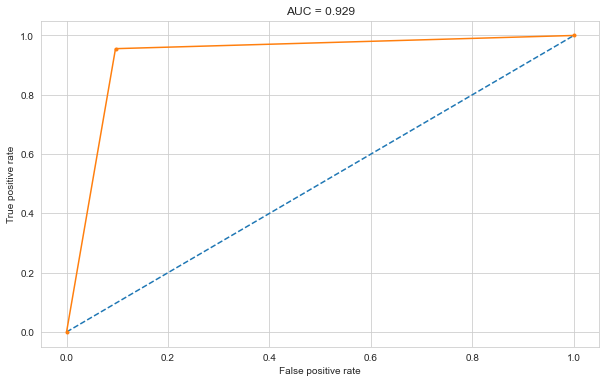

In [979]:
# Construimos las curvas ROC y AUC para evaluar el desempaño del modelo 
probs = knn_clf.predict_proba(X_test)

# Mantenemos las probabilidades de resultado positivo
probs = probs[:, 1]

# calculamos la curva AUC
knn_auc = roc_auc_score(y_test, probs)

# calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

#### 3. Arboles de Decisión (Decision trees)

Un árbol de decisión es un gráfico en forma de árbol con nodos que representan el lugar donde elegimos un atributo y formulamos una pregunta; las aristas representan las respuestas a la pregunta; y las hojas representan la salida real o la etiqueta de clase. Se utilizan en la toma de decisiones no lineales con superficies de decisión lineales simples.

Los árboles de decisión clasifican los ejemplos ordenándolos en el árbol desde la raíz hasta algún nodo de la hoja, y el nodo de la hoja proporciona la clasificación al ejemplo. Cada nodo del árbol actúa como un caso de prueba para algún atributo, y cada arista que desciende de ese nodo corresponde a una de las posibles respuestas al caso de prueba. Este proceso es de naturaleza recursiva y se repite para cada subárbol enraizado en los nuevos nodos.

In [980]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [981]:
# Buscamos los parámetros más óptimos usando Gridsearch
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [982]:
# Entrenamos el modelo
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}

In [983]:
# Hacemos las predicciones
tree_predict = tree_clf.predict(X_test)

In [984]:
# Evaluamos precisión
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Usando Decision Trees obtenemos una precisión de {round(tree_accuracy*100,2)}%")

Usando Decision Trees obtenemos una precisión de 89.71%


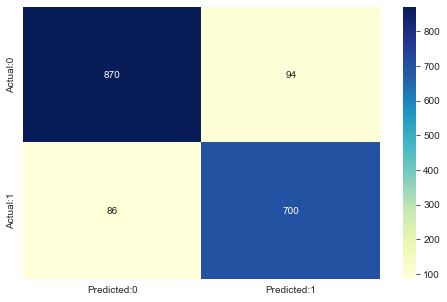

In [985]:
# Evaluamos matriz de confusión
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [986]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       964
           1       0.88      0.89      0.89       786

    accuracy                           0.90      1750
   macro avg       0.90      0.90      0.90      1750
weighted avg       0.90      0.90      0.90      1750



In [987]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'El score f1 de Descision trees es {round(tree_f1*100,2)}%')

El score f1 de Descision trees es 88.61%


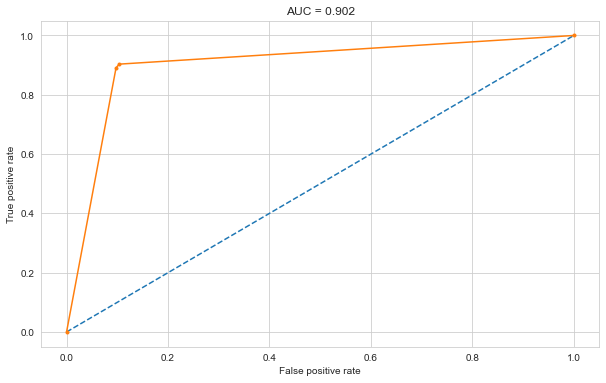

In [988]:
# Construimos las curvas ROC y AUC para evaluar el desempaño del modelo

probs = tree_clf.predict_proba(X_test)

# Mantenemos las probabilidades de resultado positivo
probs = probs[:, 1]

# Calculamos la curva AUC
tree_auc = roc_auc_score(y_test, probs)

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

#### 4. Support Vector Machine (SVM)

Una máquina de vectores de apoyo (SVM) es un clasificador discriminativo definido formalmente por un hiperplano de separación. En otras palabras, dados los datos de entrenamiento etiquetados (aprendizaje supervisado), el algoritmo produce un hiperplano óptimo que categoriza los nuevos ejemplos. En un espacio de dos dimensiones, este hiperplano es una línea que divide un plano en dos partes en las que cada clase se encuentra en un lado.

In [849]:
from sklearn.svm import SVC

In [850]:
# Buscamos los parámetros más óptimos usando Gridsearch
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [851]:
# Entrenamos el modelo
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [852]:
# Hacemos las predicciones
svm_predict = svm_clf.predict(X_test)

In [853]:
# Evaluamos precisión
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Usando SVM obtenemos una precisión de {round(svm_accuracy*100,2)}%")

Usando SVM obtenemos una precisión de 86.69%


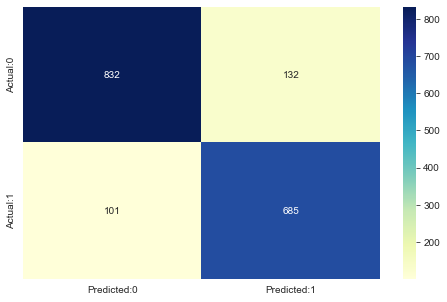

In [854]:
# Evaluamos matriz de confusión
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [855]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       964
           1       0.84      0.87      0.85       786

    accuracy                           0.87      1750
   macro avg       0.87      0.87      0.87      1750
weighted avg       0.87      0.87      0.87      1750



In [856]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'El score f1 de SVM es de {round(svm_f1*100,2)}%')

El score f1 de SVM es de 85.46%


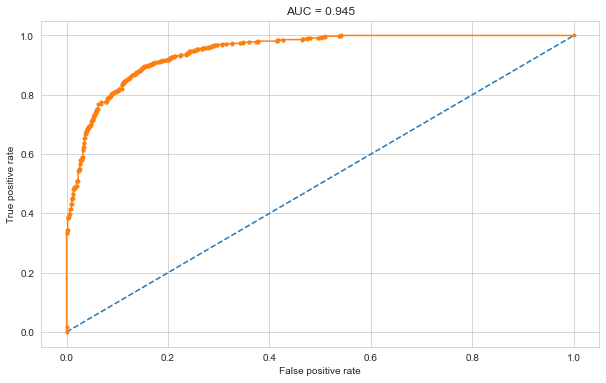

In [857]:
# Construimos las curvas ROC y AUC para evaluar el desempaño del modelo

probs = svm_clf.predict_proba(X_test)

# Mantenemos las probabilidades de resultado positivo

probs = probs[:, 1]

# Calculamos la curva AUC
svm_auc = roc_auc_score(y_test, probs)

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

#### Extreme Gradient Boosting (XGBoost)

El refuerzo de gradiente es un enfoque en el que se crean nuevos modelos que predicen los residuos o errores de los modelos anteriores y luego se suman para hacer la predicción final.

In [858]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [859]:
# Initialize the model and set the hyperparameter values
model = XGBClassifier(max_depth=2, n_estimators=30)

In [860]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [861]:
# Realizamos una Cross Validation en set de entrenamiento (Train dataset)

In [885]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Perform K-Fold Cross Validation
results = cross_val_score(model, X_train, y_train, cv=kfold)
# Print the average results
xgb_accuracy = results.mean()
print(f"Usando XGBoost obtenemos una precisión de {round(xgb_accuracy*100,2)}%")

Usando XGBoost obtenemos una precisión de 85.11%


In [889]:
# Predecimos y obtenemos el reporte de Clasificación

xgb_predict = model.predict(X_test)

# Get the classification report
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       964
           1       0.84      0.84      0.84       786

    accuracy                           0.86      1750
   macro avg       0.86      0.86      0.86      1750
weighted avg       0.86      0.86      0.86      1750



In [890]:
xgb_f1 = f1_score(y_test, xgb_predict)
print(f'El score f1 para XGBoost es de {round(xgb_f1*100,2)}%')

El score f1 para XGBoost es de 84.28%


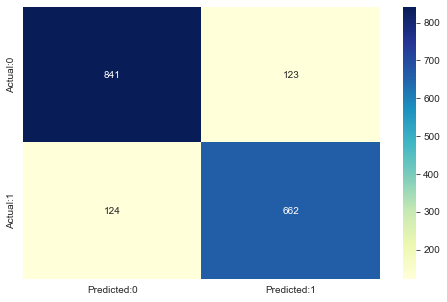

In [864]:
# Evaluamos matriz de confusión
cm= confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

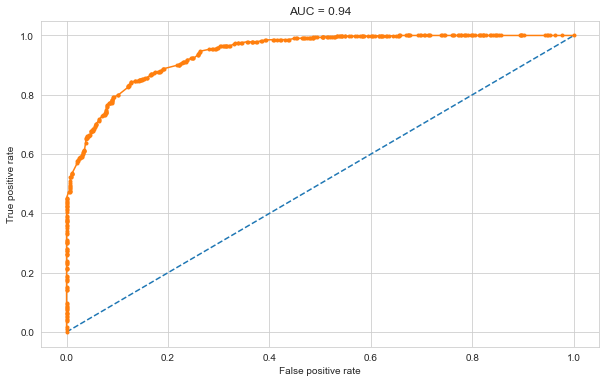

In [886]:
# Construimos las curvas ROC y AUC para evaluar el desempaño del modelo

probs = model.predict_proba(X_test)

# Mantenemos las probabilidades de resultado positivo

probs = probs[:, 1]

# Calculamos la curva AUC
xgb_auc = roc_auc_score(y_test, probs)

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_auc,3)}")
plt.show()

#### Comparación del desempeño de los Modelos

In [891]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1},
    "XGBoost":{'Accuracy':xgb_accuracy, 'AUC':xgb_auc, 'F1 score':xgb_f1}
}).T

In [892]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.776000,0.862099,0.758323
K-nearest neighbours,0.927429,0.929665,0.921750
Decision trees,0.913714,0.913811,0.904972
Support vector machine,0.866857,0.945182,0.854648
XGBoost,0.851100,0.940022,0.842775


#### Evaluación Gráfica del desempeño de los Modelos

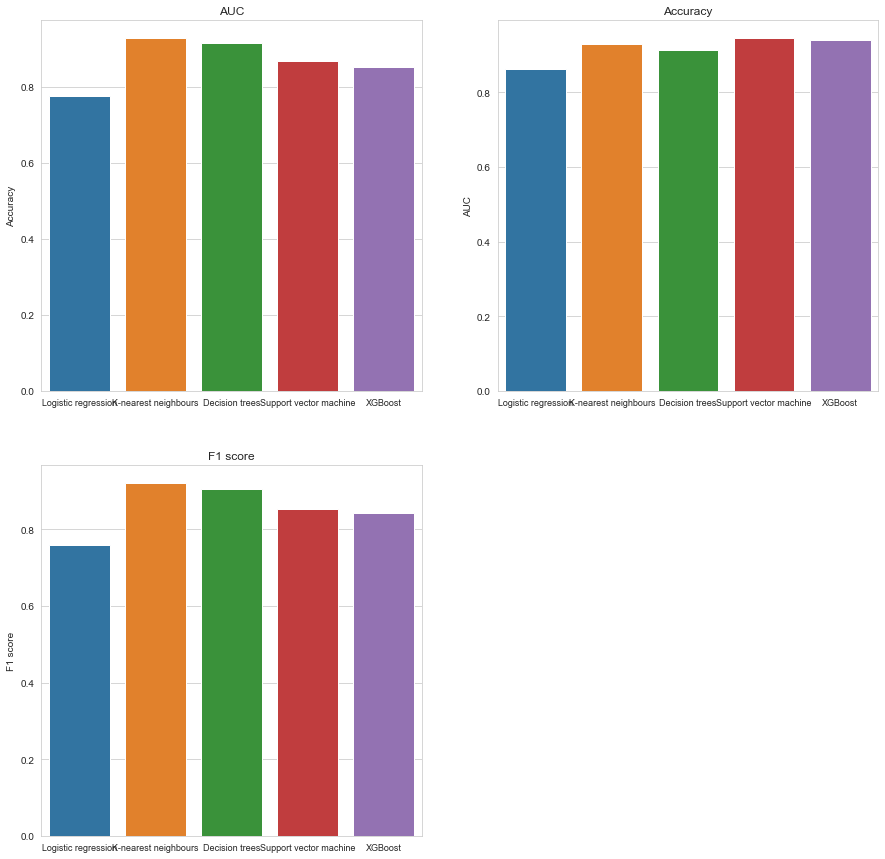

In [893]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

### CONCLUSIONES

- La mayor parte de los pacientes que han sufrido un ACV son personas mayores (>60 años).

- La mayor parte de los pacientes que han sufrido un ACV son pacientes con un índice de masa corporal de entre 20 y 40.

- Observamos que hay muchos valores atípicos en el índice de masa corporal y en el nivel medio de glucosa, 
lo que debe tratarse antes de modelar los datos.

- El factor de riesgo con mayor correlación con el ACV es la edad del paciente.

- No hay una correlación significativa entre el género de los pacientes y los pacientes que han sufrido un ACV.

- EL set de datos estaba muy desbalanceado con Una parte importante de los pacientes son pacientes que no han sufrido un ACV siendo el 95%. Apenas el 5% son pacientes que han sufrido un ACV. Este desbalance de datos puede hacer que el modelo haga predicciones incorrectas. Para evitar este fenómeno, debemos equilibrar la porción de datos. Es por ello que el rebalancceo de los datos fue clave para mejorar el desempeño de los modelos.

- Los pacientes que han sufrido un ACV son en mayor proporción (88%) los que se han casado alguna vez.

- Más pacientes que sufren un ACV son pacientes que han sufrido hipertensión.

- Más pacientes que sufren un ACV son pacientes que han padecido una enfermedad cardíaca.

- Los niños y los pacientes que nunca han trabajado tienen menos probabilidades de sufrir un ACV.

- Los pacientes que han fumado y que fuman tienen más probabilidades de sufrir un ACV.

- El modelo de aprendizaje automático que mostró mejor desempeño fue el **K-nearest neighbours** dado que presentó mejores valores en Precisión, AUC y f1-score. Se podría mejorar incorporando más datos para el entrenamiento, así como ajustando más los hiperparámetros y creando más atributos combinados. 
